Raw Dataset:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0



Data Types after Conversion:


market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           


Dataset after Feature Engineering:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0



Dataset after Handling Missing Values:


,subtotal,total_items,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,3441,4,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,1900,1,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,1900,1,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,6900,6,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3900,3,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


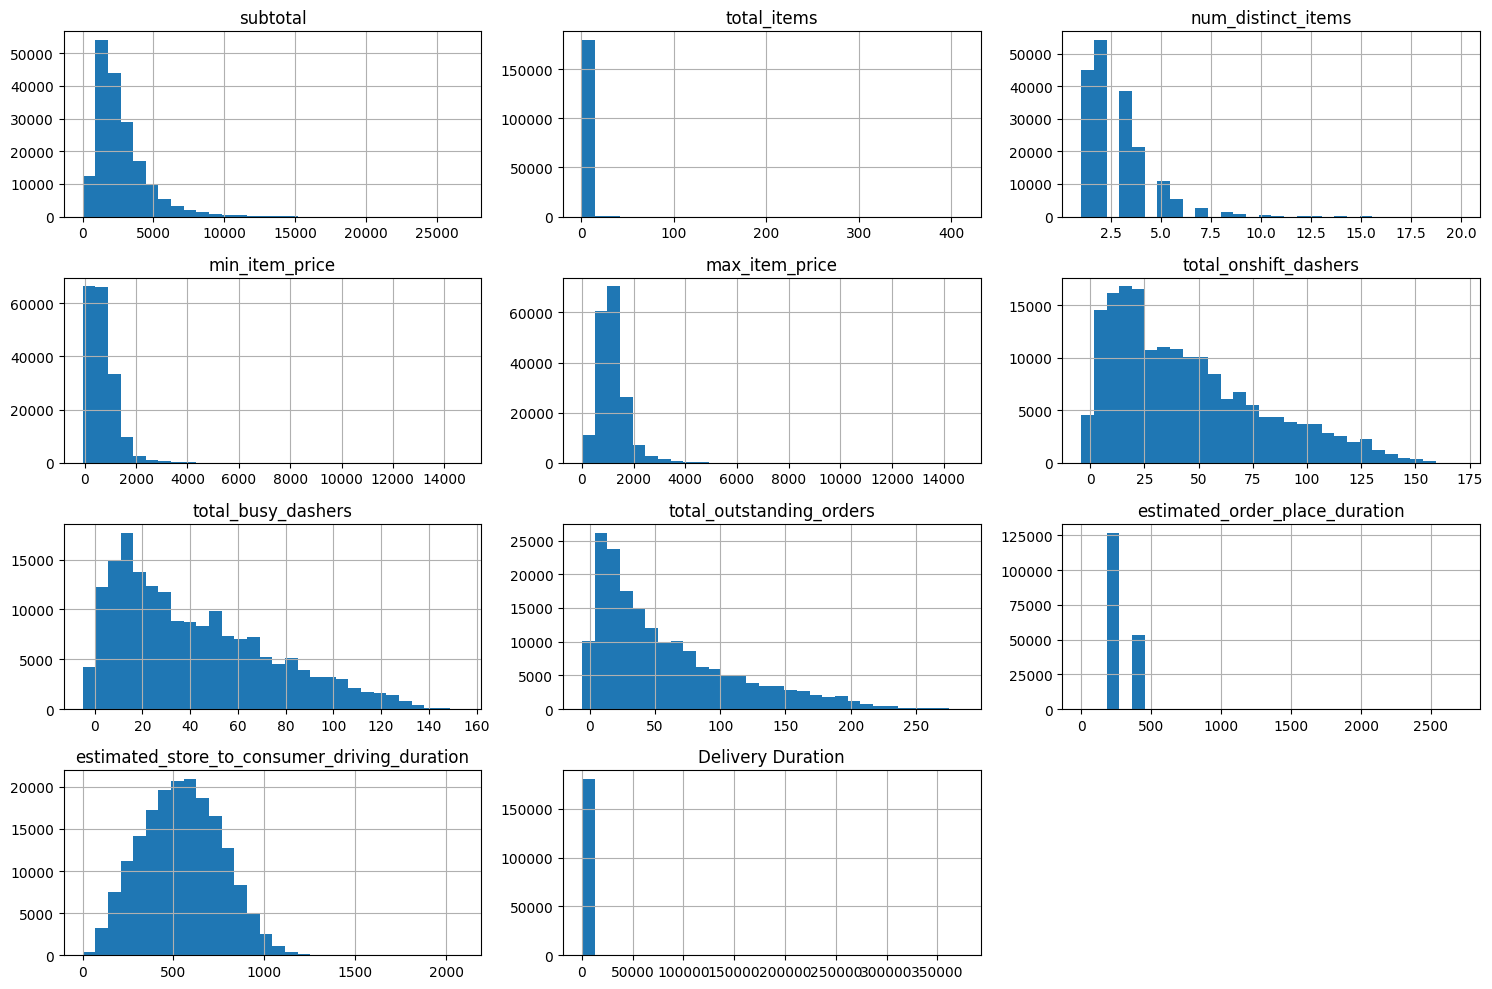

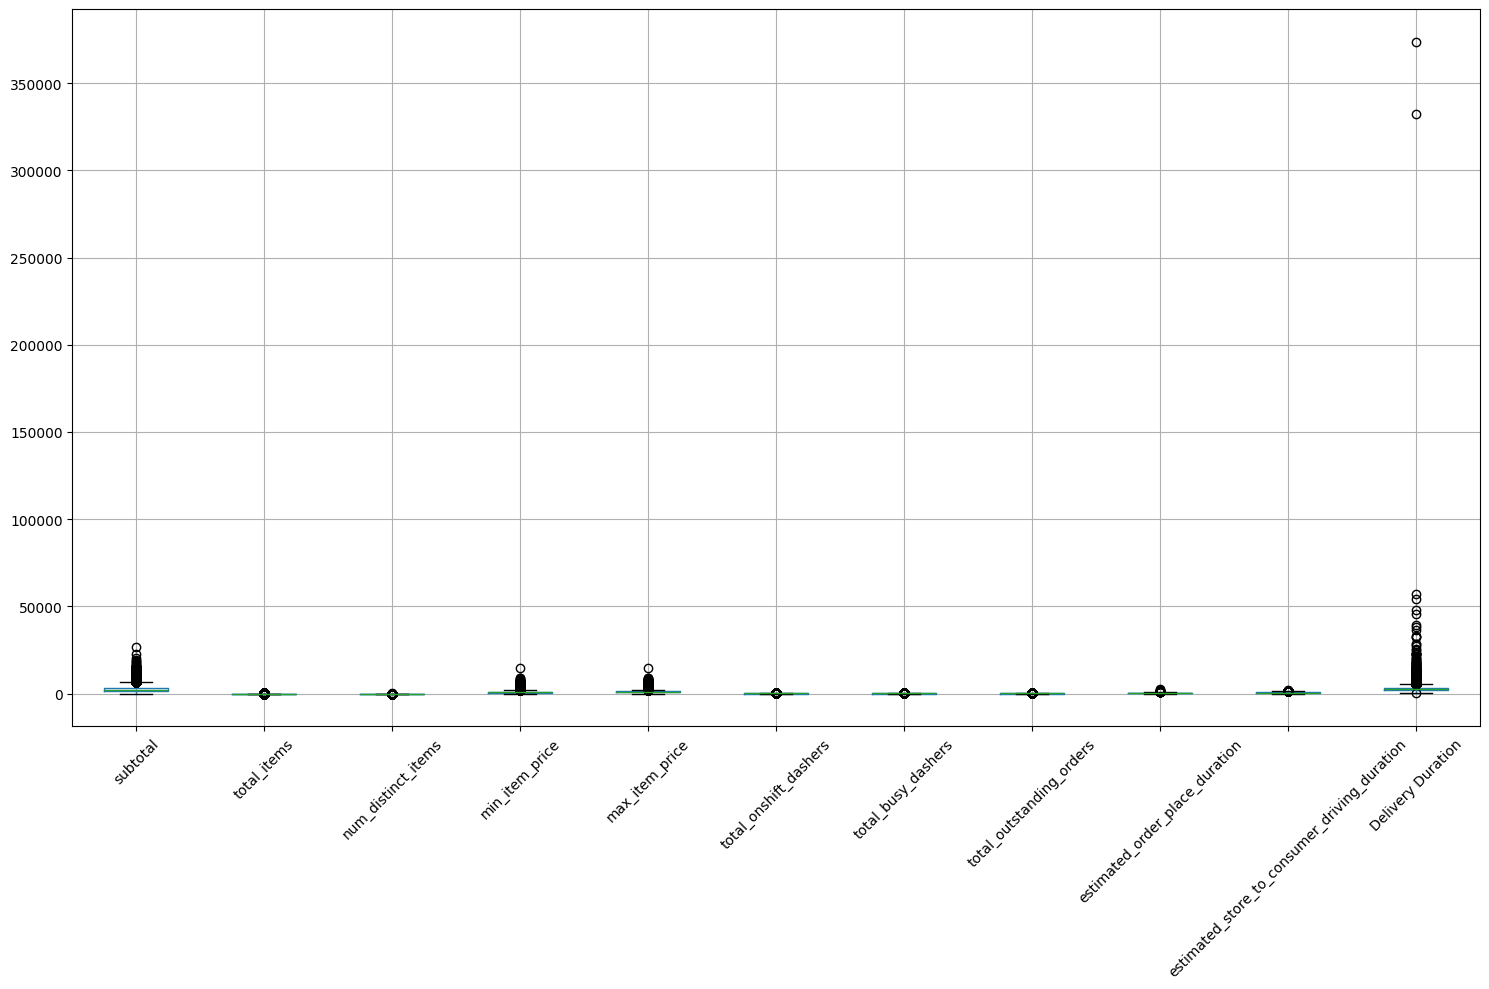

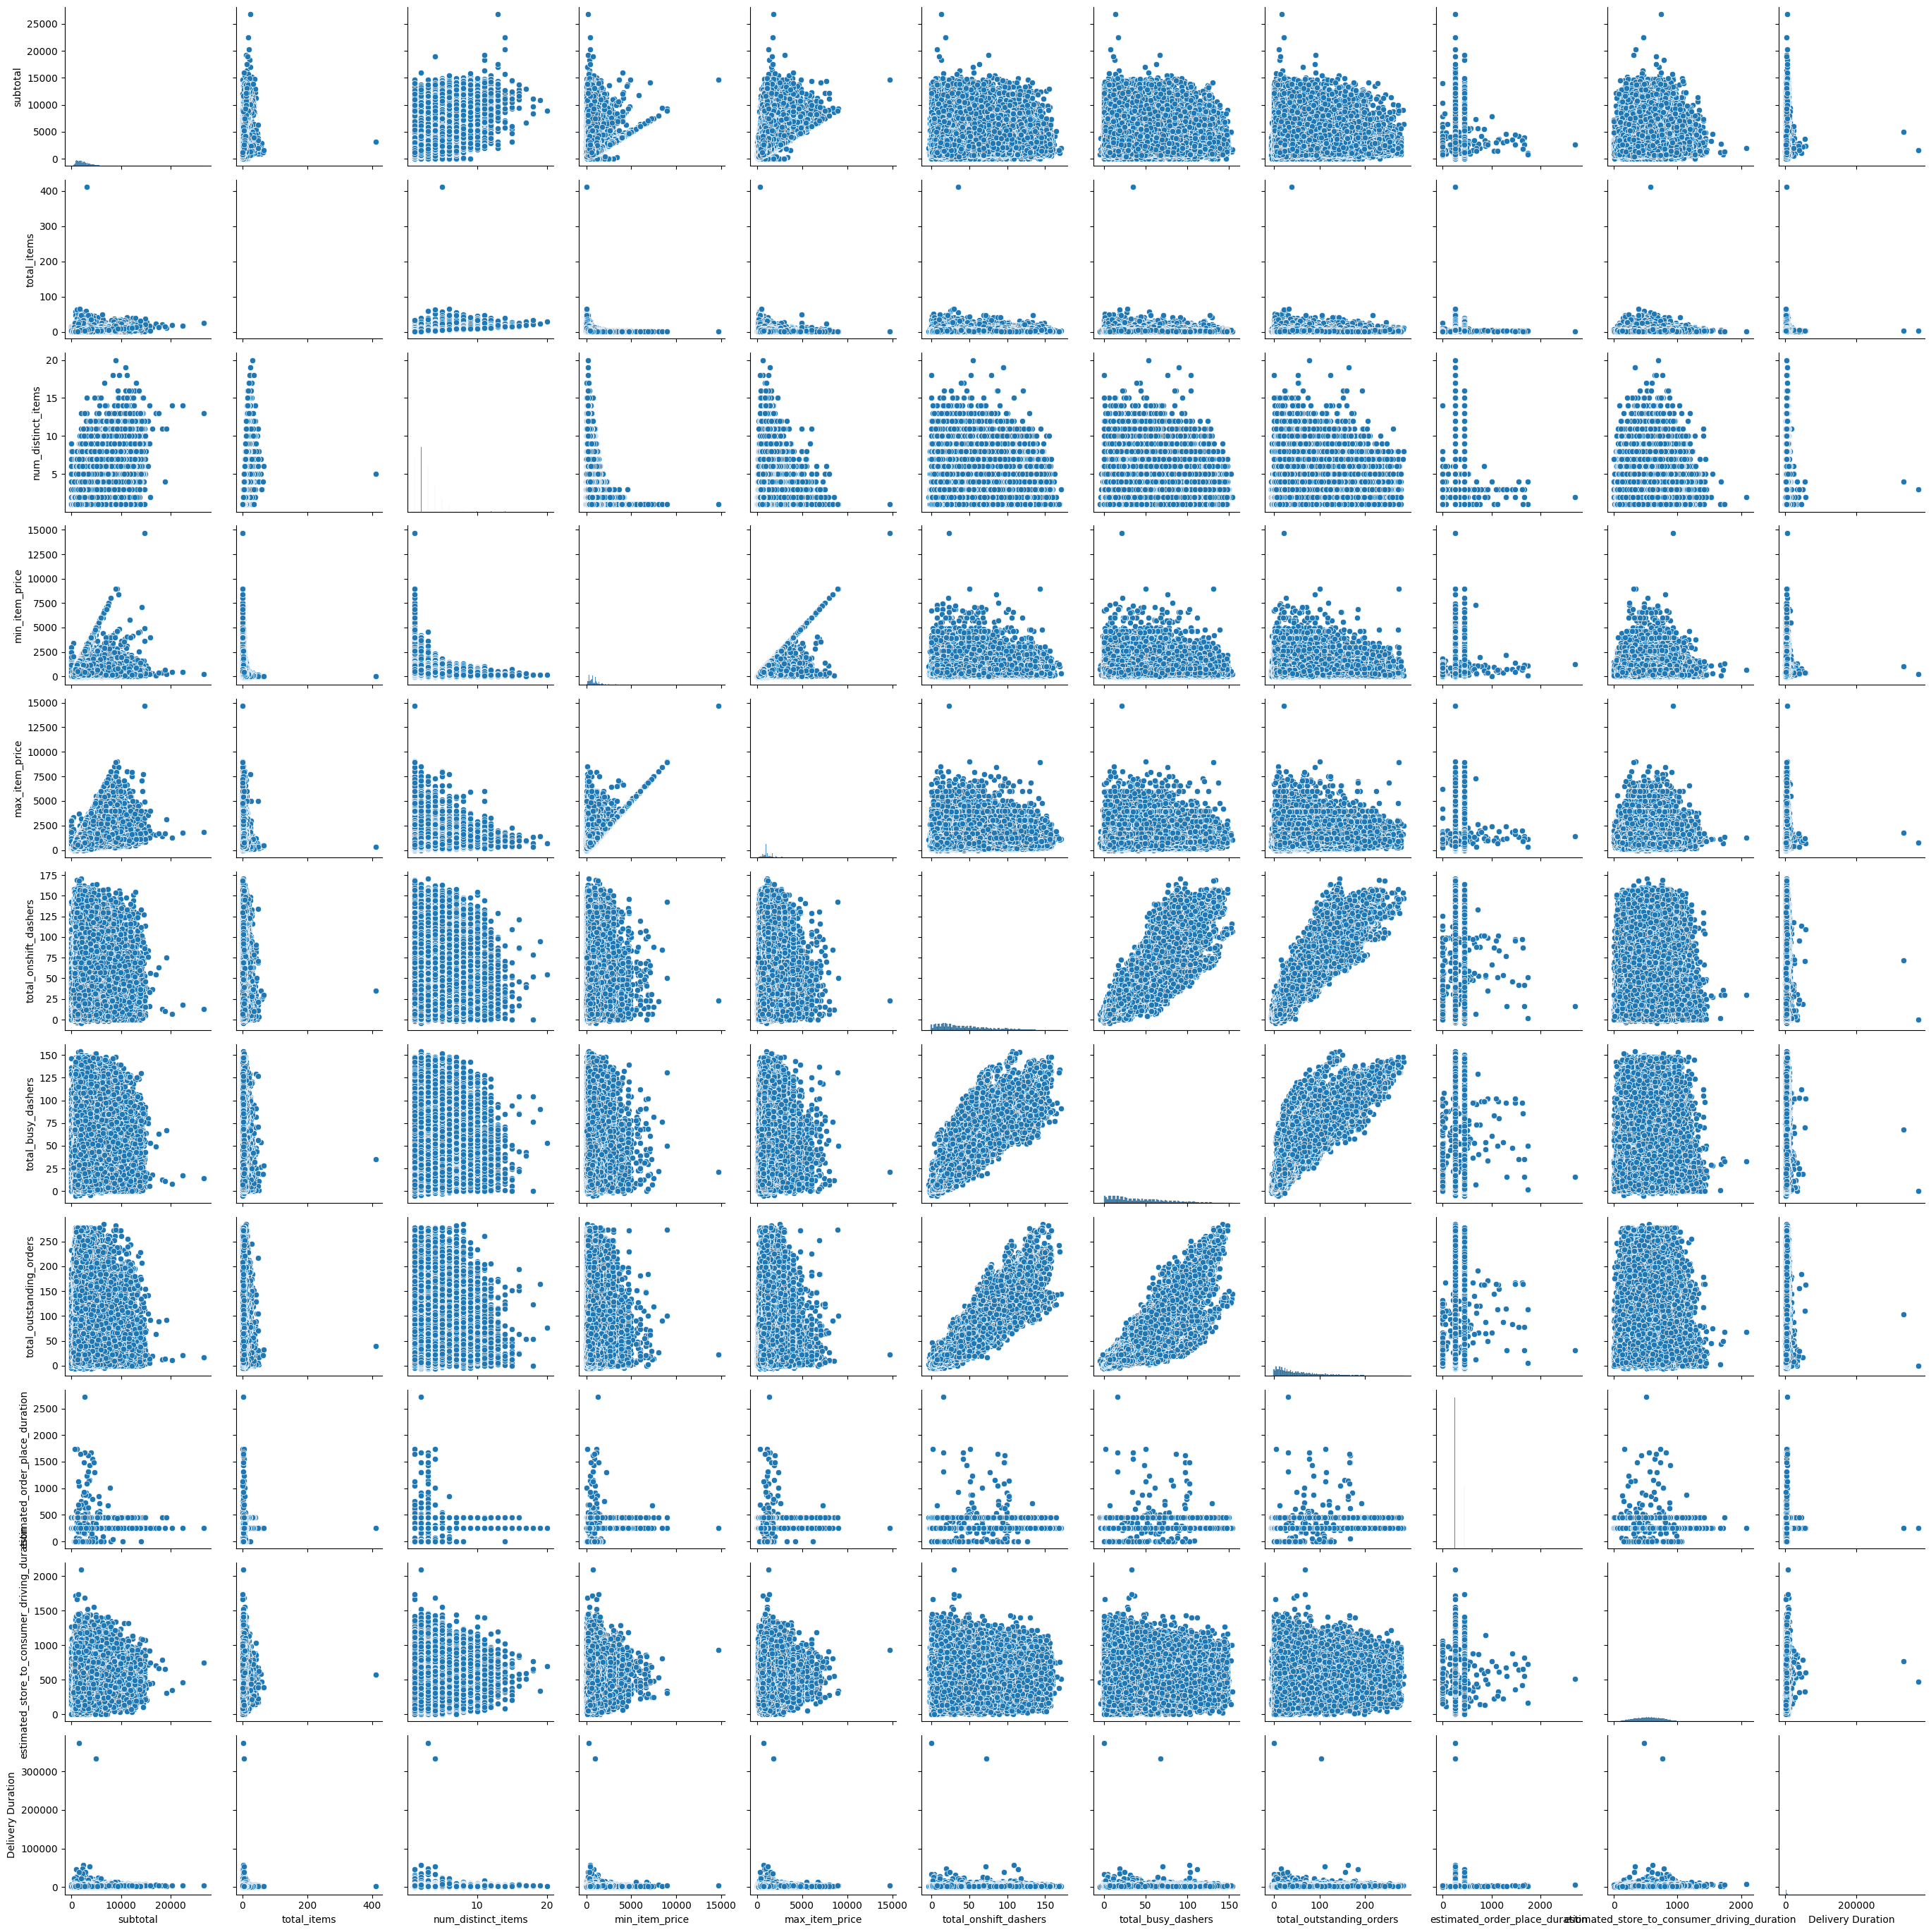

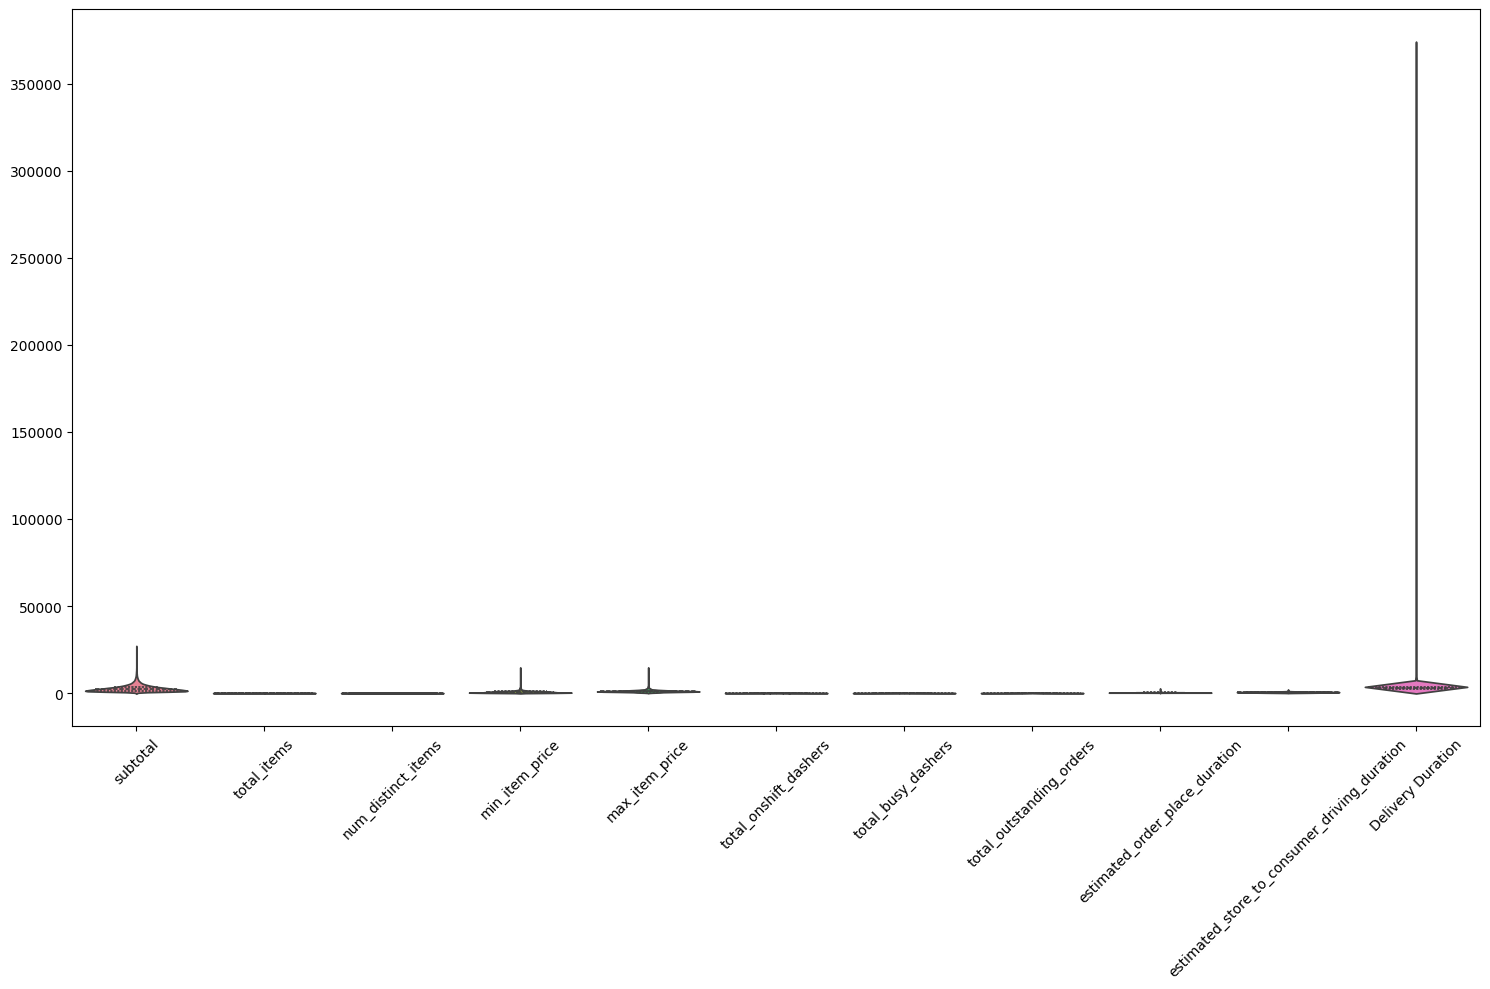

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

class DataWrangler:
    def __init__(self, url):
        self.url = url
        self.df = None
        self.features = None

    def load_data(self):
        # Load the dataset
        self.df = pd.read_csv(self.url)
        print("Raw Dataset:")
        display(self.df.head())

    def preprocess_data(self):
        # Convert datetime columns to datetime objects
        self.df['created_at'] = pd.to_datetime(self.df['created_at'])
        self.df['actual_delivery_time'] = pd.to_datetime(self.df['actual_delivery_time'])

        # Print the data types to verify the conversion
        print("\nData Types after Conversion:")
        display(self.df.dtypes)

        # Feature engineering
        self.df['Delivery Duration'] = (self.df['actual_delivery_time'] - self.df['created_at']).dt.total_seconds()

        # Print the first few rows after feature engineering
        print("\nDataset after Feature Engineering:")
        display(self.df.head())

    def select_features(self):
        # Select relevant columns for clustering
        self.features = self.df[['subtotal', 
                                 'total_items', 
                                 'num_distinct_items', 
                                 'min_item_price', 
                                 'max_item_price', 
                                 'total_onshift_dashers', 
                                 'total_busy_dashers', 
                                 'total_outstanding_orders', 
                                 'estimated_order_place_duration', 
                                 'estimated_store_to_consumer_driving_duration', 
                                 'Delivery Duration']]

        # Handle missing values if any
        self.features = self.features.dropna()

        # Print the first few rows after handling missing values
        print("\nDataset after Handling Missing Values:")
        display(self.features.head())

    def plot_histograms(self):
        # Plot histograms for each feature
        self.features.hist(figsize=(15, 10), bins=30)
        plt.tight_layout()
        plt.show()

    def plot_boxplots(self):
        # Plot box plots for each feature
        plt.figure(figsize=(15, 10))
        self.features.boxplot(rot=45)
        plt.tight_layout()
        plt.show()

    def plot_pairplot(self):
        # Plot pair plots for features
        sns.pairplot(self.features)
        plt.tight_layout()
        plt.show()

    def plot_violinplots(self):
        # Plot violin plots for each feature
        plt.figure(figsize=(15, 10))
        sns.violinplot(data=self.features, inner="quart")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def get_features(self):
        return self.features

# Usage
url = 'https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/historical_data.csv'
data_wrangler = DataWrangler(url)
data_wrangler.load_data()
data_wrangler.preprocess_data()
data_wrangler.select_features()
features = data_wrangler.get_features()

# Plot the charts
data_wrangler.plot_histograms()
data_wrangler.plot_boxplots()
data_wrangler.plot_pairplot()
data_wrangler.plot_violinplots()
